# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ttanh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")
api_key


'602a7222fcd540abb179ac7413aa3ff0'

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="Bitcoin AND BTC", language="en")
bitcoin_articles

{'status': 'ok',
 'totalResults': 1420,
 'articles': [{'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'John Biggs',
   'title': 'Bitcoin Could Hit $20K Again But This Time No One Cares',
   'description': 'If you’ve been watching the crypto markets over the past few weeks you’ll have noticed something special: bitcoin, everyone’s favorite decentralized digital currency based on hype, lies, and general malfeasance, is about to hit $20,000—if it can break through…',
   'url': 'https://gizmodo.com/bitcoin-could-hit-20k-again-but-this-time-no-one-cares-1845757159',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/puaxex5okv9olikadyqf.jpg',
   'publishedAt': '2020-11-25T23:00:00Z',
   'content': 'If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+249

In [5]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q="Ethereum AND ETH", language="en")
ethereum_articles 

{'status': 'ok',
 'totalResults': 473,
 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Reuters Staff',
   'title': 'Bitcoin rises to three-year peak, all-time high in sight - Reuters UK',
   'description': 'Bitcoin <BTC=BTSP> rose to a nearly three-year high on Friday, as investors continued to scoop the virtual currency on expectations it could well exceed its all-time peak of just under $20,000 (15,060.24 pounds).',
   'url': 'https://uk.reuters.com/article/uk-crypto-currencies-idUKKBN2801WH',
   'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201120&t=2&i=1541908846&r=LYNXMPEGAJ0ZP&w=800',
   'publishedAt': '2020-11-20T15:01:00Z',
   'content': 'By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1407 chars]'},
  {'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Reuters Sta

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
btc_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()
    

,date,text,compound,positive,negative,neutral
0,2020-11-25,If youve been watching the crypto markets over...,0.4404,0.152,0.075,0.773
1,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000
2,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000
3,2020-12-08,Keep an eye out today — we may see the first h...,0.0000,0.000,0.000,1.000
4,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
eth_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000
1,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000
2,2020-11-26,The New York Times is (probably) about to publ...,0.0000,0.000,0.000,1.000
3,2020-11-18,Each comment or response costs a tiny ETH fee ...,0.5106,0.088,0.000,0.912
4,2020-11-17,"LONDON (Reuters) - Bitcoin passed $17,000 on T...",0.2263,0.075,0.047,0.878


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.202710,0.064900,0.021950,0.91310
std,0.272493,0.053753,0.032348,0.06704
min,-0.421500,0.000000,0.000000,0.77300
25%,0.000000,0.000000,0.000000,0.87475
50%,0.152950,0.065500,0.000000,0.91350
75%,0.453775,0.108750,0.047000,0.96250
max,0.612400,0.152000,0.085000,1.00000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.327700,0.076778,0.002611,0.920611
std,0.312222,0.071972,0.011078,0.072752
min,0.000000,0.000000,0.000000,0.831000
25%,0.000000,0.000000,0.000000,0.850000
50%,0.261150,0.070500,0.000000,0.923000
75%,0.651000,0.150000,0.000000,1.000000
max,0.726400,0.169000,0.047000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
add_stopwords = [',', '', 'https', 'http', 'btc', 'bitcoin', 'eth', 'ethereum']

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)
    # Convert the words to lowercase
    text = [word.lower() for word in text]
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    # Remove the stop words
    sw = set(stopwords.words('english') + add_stopwords)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    
    return text

In [13]:
# Create a new tokens column for Bitcoin
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in btc_df.text]   
btc_df['Tokens'] = btc_tokens
btc_df.head()

,date,text,compound,positive,negative,neutral,Tokens
0,2020-11-25,If youve been watching the crypto markets over...,0.4404,0.152,0.075,0.773,"[youve, watching, crypto, market, past, week, ..."
1,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000,"[reuters, staff, representation, virtual, curr..."
2,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000,"[reuters, staff, representation, virtual, curr..."
3,2020-12-08,Keep an eye out today — we may see the first h...,0.0000,0.000,0.000,1.000,"[keep, eye, today, may, see, first, highaltitu..."
4,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."


In [14]:
# Create a new tokens column for Ethereum
eth_tokens = []
[eth_tokens.append(tokenizer(text)) for text in eth_df.text]   
eth_df['Tokens'] = eth_tokens
eth_df.head()

,date,text,compound,positive,negative,neutral,Tokens
0,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000,"[reuters, staff, representation, virtual, curr..."
1,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000,"[reuters, staff, representation, virtual, curr..."
2,2020-11-26,The New York Times is (probably) about to publ...,0.0000,0.000,0.000,1.000,"[new, york, time, probably, publish, story, cr..."
3,2020-11-18,Each comment or response costs a tiny ETH fee ...,0.5106,0.088,0.000,0.912,"[comment, response, cost, tiny, fee, cryptocur..."
4,2020-11-17,"LONDON (Reuters) - Bitcoin passed $17,000 on T...",0.2263,0.075,0.047,0.878,"[london, reuters, passed, tuesday, touch, high..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.Tokens]
dict(btc_bigram_counts[0].most_common(10))

{('youve', 'watching'): 1,
 ('watching', 'crypto'): 1,
 ('crypto', 'market'): 1,
 ('market', 'past'): 1,
 ('past', 'week'): 1,
 ('week', 'youll'): 1,
 ('youll', 'noticed'): 1,
 ('noticed', 'something'): 1,
 ('something', 'special'): 1,
 ('special', 'everyones'): 1}

In [17]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.Tokens]
dict(eth_bigram_counts[0].most_common(10))

{('reuters', 'staff'): 1,
 ('staff', 'representation'): 1,
 ('representation', 'virtual'): 1,
 ('virtual', 'currency'): 1,
 ('currency', 'seen'): 1,
 ('seen', 'illustration'): 1,
 ('illustration', 'taken'): 1,
 ('taken', 'november'): 1,
 ('november', 'reutersdado'): 1,
 ('reutersdado', 'ruvicillustration'): 1}

In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Get the top 10 words for Bitcoin
bigstr = []
for tokens in btc_df.Tokens:
    bigstr += tokens
btc_token_count = token_count(bigstr)
btc_token_count

[('char', 20), ('reuters', 11), ('currency', 8)]

In [20]:
# Get the top 10 words for Ethereum
bigstr = []
for tokens in eth_df.Tokens:
    bigstr += tokens
eth_token_count = token_count(bigstr)
eth_token_count

[('char', 18), ('reuters', 7), ('contract', 6)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

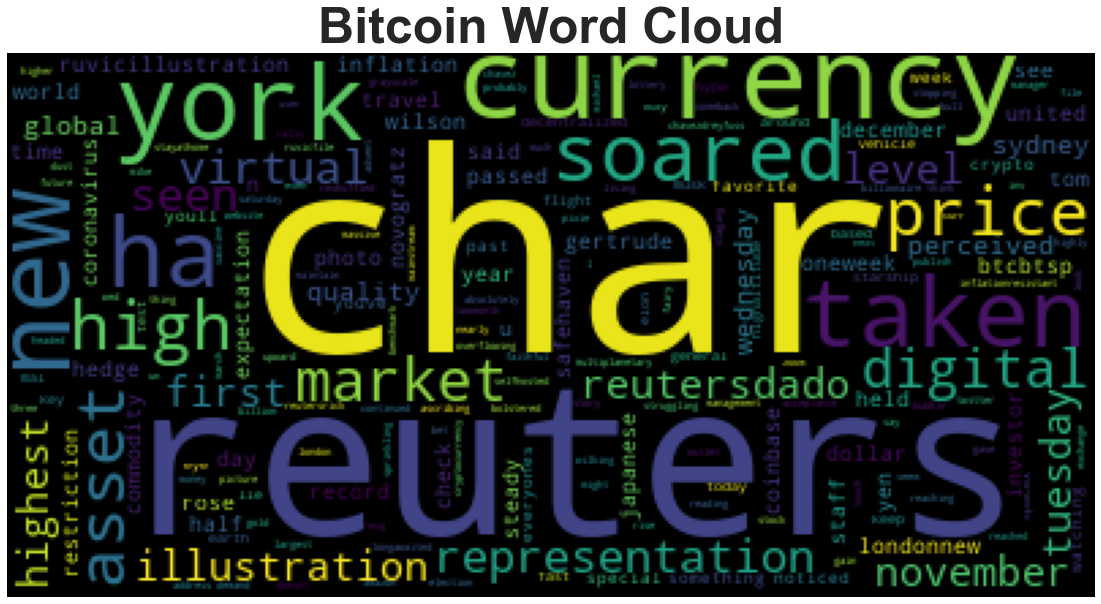

In [22]:
# Generate the Bitcoin word cloud
btc_corpus = ''
sw = set(stopwords.words('english') + add_stopwords)
for token in btc_df.text:
    btc_corpus += token
long_string = " ".join(str(x) for x in tokenizer(btc_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

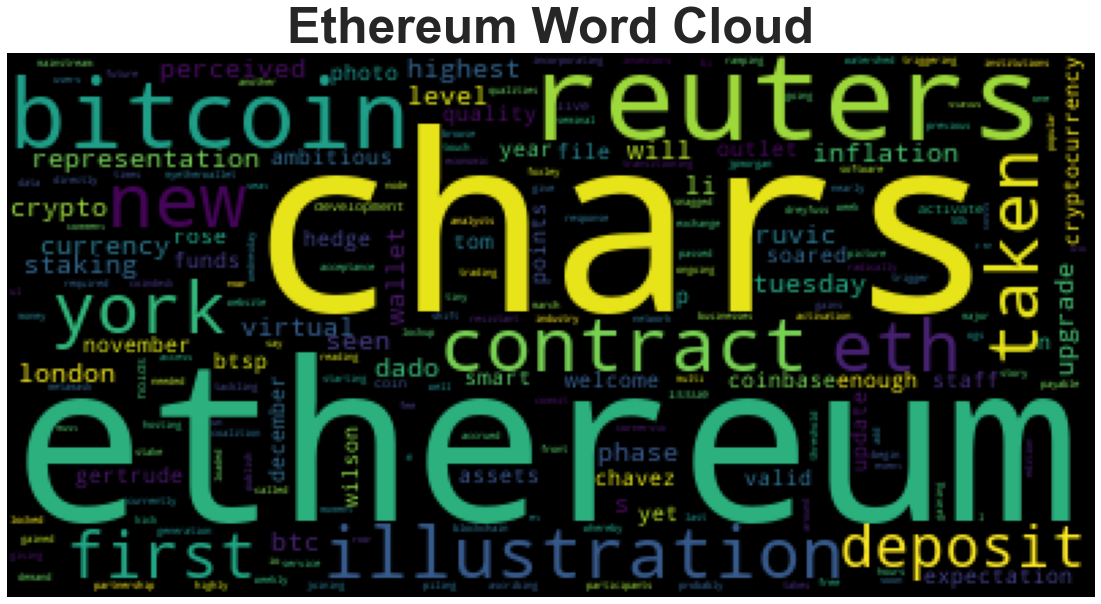

In [23]:
# Generate the Ethereum word cloud
eth_corpus = ''
for token in eth_df.text:
    eth_corpus += token.lower()
long_string = " ".join(str(x) for x in tokenizer(eth_corpus))
wc = WordCloud(collocations=False).generate(eth_corpus)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_corpus

"If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars]By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1407 chars]By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1388 chars]Keep an eye out today — we may see the first high-altitude test flight for SpaceX’s Starship. The vehicle Elon Musk sees as the key to fast travel around the Earth and multiplanetary living has only … [+3833 chars]In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 d

In [28]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_corpus)

# Add a title to the document
btc_ner.user_data["title"] = "Bitcoin NER"

In [29]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [30]:
# List all Entities
btc_ents = set([ent.text for ent in btc_ner.ents ])
btc_ents

{'1',
 '10,000',
 '17,000',
 '19,665',
 '2017.The digital-currency enthusiast',
 'Amazon',
 'Asian',
 'BTC',
 'Bitcoin',
 'BlackRock',
 'CNBC',
 'Chavez-Dreyfuss',
 'Coinbase',
 'December 2017',
 'Earth',
 'Elon Musk',
 'Friday',
 'Grayscale',
 'Japanese',
 'LONDON',
 'March 13, 2020',
 'Michael\xa0Novogratz',
 'Mike Novogratz',
 'New Bitcoin',
 'New York Times',
 'November 19, 2020',
 'November 2017',
 'REUTERS/',
 'Reuters',
 'Rick Rieder',
 'Rick Wilking',
 'Saturday',
 'Thursday',
 'Tom Wilson',
 'Tuesday',
 'Twitter',
 'U.S.',
 'United',
 'Wednesday',
 'YORK',
 'Zoom',
 'a record $10.4 billion',
 'bitcoin',
 'digital',
 'first',
 'half',
 'hype',
 'nearly three years',
 'one-week',
 'over $15k',
 'the United states',
 'the bubble days of 2017',
 'the next 20 days',
 'the past few weeks',
 'this year',
 'today',
 'two-month'}

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_corpus

"by reuters staff\r\na representation of virtual currency bitcoin is seen in this illustration taken november 19, 2020. reuters/dado ruvic/illustration\r\nnew york (reuters) - bitcoin btc=btsp rose to a n… [+1407 chars]by reuters staff\r\na representation of virtual currency bitcoin is seen in this illustration taken november 19, 2020. reuters/dado ruvic/illustration\r\nnew york (reuters) - bitcoin btc=btsp rose to a n… [+1388 chars]the new york times is (probably) about to publish a story about cryptocurrency exchange coinbase. but we're not reading about it on the news outlet's website, because coinbase has taken the highly un… [+3993 chars]each comment or response costs a tiny eth fee of 0.00011 (about 5¢ in ethereum cryptocurrency), payable from your metamask.io wallet (the wallet is free, and takes just a moment to add to your browse… [+558 chars]london (reuters) - bitcoin passed $17,000 on tuesday to touch its highest level this year, with investors ascribing the gains to demand 

In [32]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_corpus)

# Add a title to the document
eth_ner.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [34]:
# List all Entities
eth_ents = ([ent.text for ent in eth_ner.ents ])
set(eth_ents)

{'0.00011',
 '10%',
 '17,000',
 '2.0',
 '2.6%',
 '21:00',
 '32',
 '385,440',
 '4 p.m. et',
 '50k',
 'about 5¢',
 'around $15,694',
 'btsp rose',
 'chars]london/new york',
 'chars]more than 500,000',
 'chars]the new york times',
 'chavez-dreyfuss',
 'december 2017',
 'first',
 'jpmorgan',
 'last week',
 'london',
 'march 13, 2020',
 'multi-year',
 'new york',
 'november 19, 2020',
 'reuters',
 'reuters/dado ruvic//file',
 'the previous 24',
 'this year',
 'tom wilson',
 'tuesday',
 'ul><li',
 'un',
 'wednesday',
 'weekly'}

---